<a href="https://colab.research.google.com/github/bharathgoud000/bharath/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [193]:
df =pd.read_csv("/content/drive/MyDrive/datasets/Heart_Disease_Prediction.csv")

In [194]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [195]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

In [196]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [198]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [199]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [200]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
265,False
266,False
267,False
268,False


In [201]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [202]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
la=LabelEncoder()

In [204]:
y_encoded = la.fit_transform(y)
print(y_encoded)
print(type(y_encoded))
print(y_encoded.dtype)

[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]
<class 'numpy.ndarray'>
int64


In [205]:

X=df.drop("Heart Disease",axis=1)
y=df['Heart Disease']

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [207]:
X_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
115,49,0,2,134,271,0,0,162,0,0.0,2,0,3
33,59,1,4,170,326,0,2,140,1,3.4,3,0,7
184,53,1,3,130,246,1,2,173,0,0.0,1,3,3
142,50,1,3,140,233,0,0,163,0,0.6,2,1,7
197,54,0,3,110,214,0,0,158,0,1.6,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,120,229,0,2,129,1,2.6,2,2,7
188,62,0,4,140,394,0,2,157,0,1.2,2,0,3
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3
106,51,1,3,100,222,0,0,143,1,1.2,2,0,3


In [208]:
X_test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7
116,46,1,4,120,249,0,2,144,0,0.8,1,0,7
79,56,1,2,120,236,0,0,178,0,0.8,1,0,3
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3
137,56,1,4,125,249,1,2,144,1,1.2,2,1,3
209,37,1,3,130,250,0,0,187,0,3.5,3,0,3
45,58,1,3,140,211,1,2,165,0,0.0,1,0,3
158,56,1,1,120,193,0,2,162,0,1.9,2,0,7
247,65,0,3,155,269,0,0,148,0,0.8,1,0,3


In [209]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (216, 13)
X_test (54, 13)
y_train (216,)
y_test (54,)


In [210]:
y_test

,Heart Disease
30,1
116,1
79,0
127,0
196,0
137,1
209,0
45,0
158,0
247,0


In [211]:
lr = RandomForestClassifier(n_estimators=100,random_state=42)

In [212]:
lr

RandomForestClassifier(random_state=42)

In [213]:
lr.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [191]:
y_pred = lr.predict(X_test)

In [214]:
 y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [215]:
accuracy = accuracy_score(y_test,y_pred)

In [216]:
accuracy

0.7962962962962963

In [217]:
classs = classification_report(y_test,y_pred)

In [219]:
print(classs)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



Text(50.722222222222214, 0.5, 'Actual')

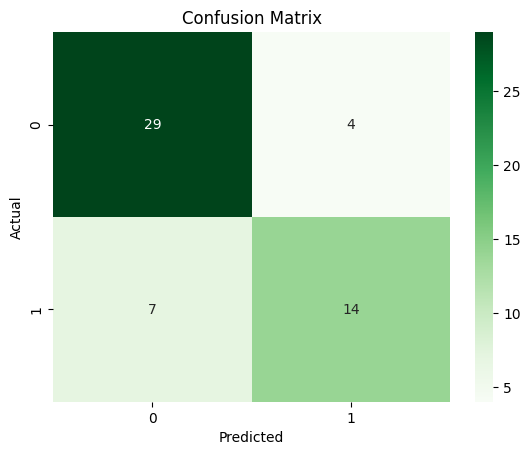

In [220]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [222]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [223]:
roc_auc

np.float64(0.7727272727272727)